<a href="https://colab.research.google.com/github/SavantLogics/SavantLogics/blob/main/Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import io
import seaborn as sns
from scipy import stats
from google.colab import files
from numpy import random
from sklearn.linear_model import LinearRegression

%matplotlib inline

##In this section, you will use the data for ONE variable only. Pick the variable that is more interesting to analyze. For example: if your independent variable is sequential data such as year with 30 years and one piece of data per year, your x-values might be 1971, 1972, 1973, 1974, …, 2000. This would not be interesting to analyze. In that case, choose to use the dependent variable to analyze for this part of the project.

In [ ]:
video_games = files.upload() 

Saving Video_Games_Sales_as_at_22_Dec_2016.csv to Video_Games_Sales_as_at_22_Dec_2016.csv


In [ ]:
vg = pd.read_csv(io.BytesIO(video_games['Video_Games_Sales_as_at_22_Dec_2016.csv']))
vg.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8,322
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0,0,0,0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8,192
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0,0,0,0


In [ ]:
vg.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score         int64
Critic_Count         int64
User_Score          object
User_Count           int64
dtype: object

In [70]:
# Get the top 50 games that sold the most on a global scale.

fifty_games = vg[: 50]
sales = fifty_games['NA_Sales'].fillna(0)

In [99]:
sales

,NA_Sales
0,41.36
1,29.08
2,15.68
3,15.61
4,11.27
5,23.20
6,11.28
7,13.96
8,14.44
9,26.93


##Summarize your data in a chart with columns showing data value, frequency, relative frequency, and cumulative relative frequency.

In [100]:
# Summarize the data 

sales.describe()

,NA_Sales
count,50.000000
mean,9.822200
std,7.129288
min,2.500000
25%,5.915000
50%,8.330000
75%,10.550000
max,41.360000


In [73]:
# Frequency  of each score

frequency_sales = pd.crosstab(index=sales['NA_Sales'], columns='Frequency Count')
frequency_sales

col_0,Frequency Count
NA_Sales,
2.50,1
3.01,1
3.43,1
3.96,1
4.34,1
4.35,1
4.74,1
4.99,1
5.03,1


In [74]:
# Relative Frequency 

relative_freq = sales['NA_Sales'].value_counts(normalize=True)
relative_freq

6.06     0.04
41.36    0.02
5.51     0.02
6.85     0.02
9.04     0.02
5.89     0.02
6.03     0.02
9.70     0.02
5.28     0.02
4.99     0.02
8.25     0.02
8.52     0.02
5.54     0.02
6.99     0.02
6.62     0.02
5.03     0.02
5.99     0.02
3.96     0.02
2.50     0.02
7.97     0.02
6.91     0.02
4.34     0.02
4.35     0.02
3.43     0.02
8.41     0.02
29.08    0.02
9.66     0.02
15.68    0.02
15.61    0.02
11.27    0.02
23.20    0.02
11.28    0.02
13.96    0.02
14.44    0.02
26.93    0.02
9.05     0.02
9.71     0.02
9.00     0.02
8.92     0.02
15.00    0.02
9.01     0.02
7.02     0.02
9.43     0.02
12.78    0.02
4.74     0.02
6.38     0.02
10.83    0.02
9.54     0.02
3.01     0.02
Name: NA_Sales, dtype: float64

In [75]:
# Cumulative Relative Frequency

cumulative_freq = relative_freq.cumsum()
cumulative_freq

6.06     0.04
41.36    0.06
5.51     0.08
6.85     0.10
9.04     0.12
5.89     0.14
6.03     0.16
9.70     0.18
5.28     0.20
4.99     0.22
8.25     0.24
8.52     0.26
5.54     0.28
6.99     0.30
6.62     0.32
5.03     0.34
5.99     0.36
3.96     0.38
2.50     0.40
7.97     0.42
6.91     0.44
4.34     0.46
4.35     0.48
3.43     0.50
8.41     0.52
29.08    0.54
9.66     0.56
15.68    0.58
15.61    0.60
11.27    0.62
23.20    0.64
11.28    0.66
13.96    0.68
14.44    0.70
26.93    0.72
9.05     0.74
9.71     0.76
9.00     0.78
8.92     0.80
15.00    0.82
9.01     0.84
7.02     0.86
9.43     0.88
12.78    0.90
4.74     0.92
6.38     0.94
10.83    0.96
9.54     0.98
3.01     1.00
Name: NA_Sales, dtype: float64

In [76]:
from numpy.ma.extras import average
# Sample mean 

sales.mean()

NA_Sales    9.8222
dtype: float64

In [77]:
# Sample standard deviation 
sales.std()

NA_Sales    7.129288
dtype: float64

In [78]:
# First quartile 
sales.quantile(q=0.25)

NA_Sales    5.915
Name: 0.25, dtype: float64

In [79]:
# Third quartile 
sales.quantile(q=0.75)

NA_Sales    10.55
Name: 0.75, dtype: float64

In [80]:
# Median
sales.median()

NA_Sales    8.33
dtype: float64

In [81]:
# 70th percentile
sales.quantile(q=0.70)

NA_Sales    9.672
Name: 0.7, dtype: float64

Answer the following question, rounded to two decimal places:

In [82]:
# Value that is 2 standard deviations above the mean. Mean plus standard deviation(2)

sales.mean() + sales.std() *2

NA_Sales    24.080777
dtype: float64

In [83]:
# Value that is 1.5 standard deviations below the mean. Mean minus standard deviation(1.5)

sales.mean() - sales.std()*(1.5) 

NA_Sales   -0.871733
dtype: float64

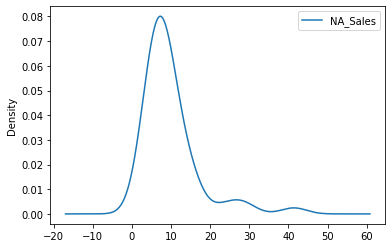

In [84]:
sales.plot.kde()

In [87]:
sales.describe()

,NA_Sales
count,50.000000
mean,9.822200
std,7.129288
min,2.500000
25%,5.915000
50%,8.330000
75%,10.550000
max,41.360000


##Construct a histogram displaying your data. Group your data into six to ten intervals of equal width. Pick regularly spaced intervals that make sense in relation to your data. 

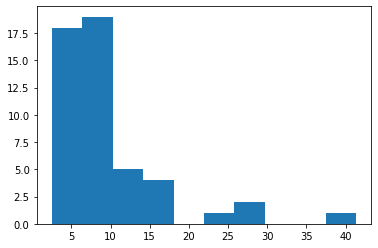

In [95]:
sales['NA_Sales'].hist(bins=10, grid=False)

##In complete sentences, describe the shape of your histogram.

A right-skewed histogram has a peak that is left of center and a more gradual tapering to the right side of the graph. I believe the  histogram is right skewed because the sample was based off of sales in descending order. 

##Are there any potential outliers? Which values are they? Show your work and calculations as to how you used the potential outlier formula in CH3: Descriptive Statistics (since you are now using univariate data) to determine which values might be outliers.

In [96]:
# To see if a data point is an outlier and check if it falls farther than three standard deviations, we calculate:
# Q1–1.5 x IQR
# Q3 + 1.5 x IQR

5.915 - 1.5 * 4.64 # Q1–1.5 x IQR

-1.044999999999999

In [97]:
10.55 + 1.5 * 4.64 # Q3 + 1.5 x IQR

17.509999999999998

According to the Outlier formula any number in sales passed 17.509 is considered an outlier. There are 4 data points considered outliers and they are 

23.20	
26.93	
29.08	
41.36. 

##Construct a box plot of your data.

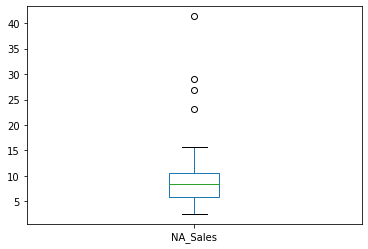

In [102]:
sales.boxplot( grid=False)

##Does the middle 50% of your data appear to be concentrated together or spread out? Explain how you determined this.

The majority of the data is seems to be concentrated together because  the majority of sales was near the mean of  8.33 million sales. 

## Looking at both the histogram AND the box plot, discuss the distribution of your data. For example: how does the spread of the middle 50% of your data compare to the spread of the rest of the data represented in the box plot; how does this correspond to your description of the shape of the histogram; how does the graphical display show any outliers you may have found; does the histogram show any gaps in the data that are not visible in the box plot; are there any interesting features of your data that you should point out.

The spread of the middle 50%  is concentrated between 5 and 10 million sales whereas the rest of the sales were between 2 and 15 million. This corresponds to being a right skewed distribution because the 4 outliers passed 3 standard deviations above the mean. Therefore skewing the data more to the right. The histogram does not show any gaps in the top 50 games sold. I do find it interesting that the number sold game is an exercise / sports game that makes the player move in order for the avatar on the screen to move called Wii -U Sports. 